<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Introducción a la Química Cuántica</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

### <div class="alert alert-success"> <h3 class="alert-heading"> Solución de la ecuación de Schrödinger de Modelos Simples:</h3> <h4 class="alert-heading">Modelo de la Partícula en una caja (1D) de paredes de potencial infinito</h4><p>

In [1]:
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Los códigos de este "IPython notebook" se mantienen ocultas por defecto para una mejor lectura. Las celdas aparecen vacias,
con una línea azul en la parte izquierda, podrá observar los codigos en las celda haciendo click, <a href="javascript:code_toggle()">aquí</a>.''')

### Librerias usadas:

In [2]:
import matplotlib as mpl # Libreria para graficación y visualización
import matplotlib.pylab as plt # Libreria para graficación y visualización
import numpy as np # Librería para manipulación numerica, especialmente para arreglos de datos

<div class="alert alert-warning">La siguiente celda configura `matplotlib` para mostrar las graficas embebidads en Notebook en lugar de abrirlas en una nueva ventana.

In [3]:
%matplotlib inline

## <div class="alert alert-info">Particula en una caja 1D </div>

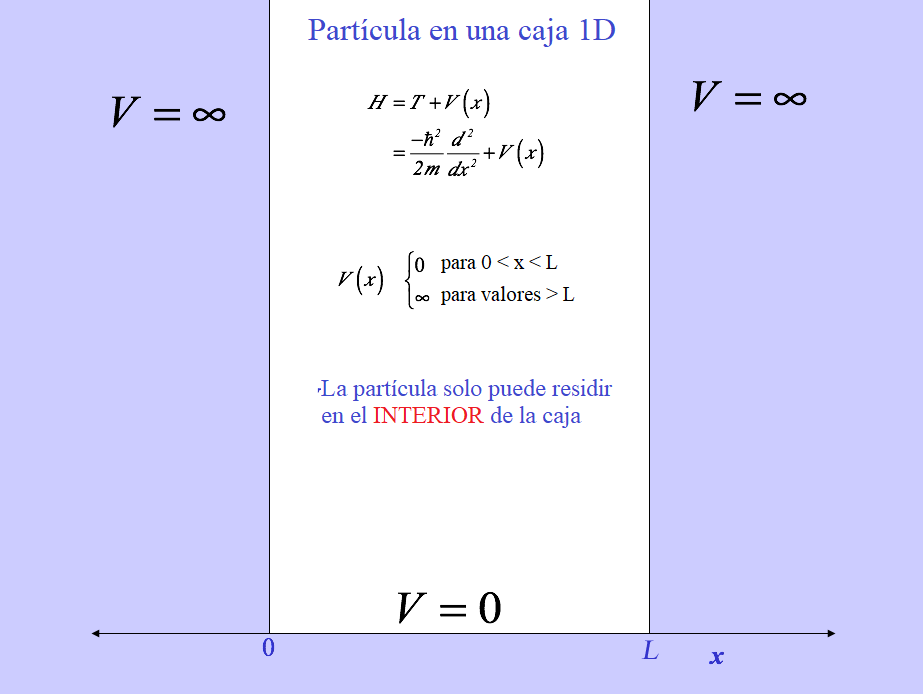

In [4]:
from IPython.display import Image
Image(filename='particula_en_una_caja_infinita.png')

<div class="alert alert-info">En el interior de la caja, el potencial es igual a cero, por tanto la ecuación de Schrödinger para este sistema está dado por:
$$\large \frac{-\hbar^2}{2m}\frac{\partial^2\psi_n(x)}{\partial{x}^2} =E\psi_n(x) $$

Puesto que el potencial es infinito y positivo fuera de la caja, la función de onda del sistema debe obedecer las iguientes **condiciones de frontera**:
$$\large \psi_n(0)=\psi_n(L)=0$$
para asegurar las características de continuidad en todo el espacio de la función y dondee *L* es la longitud de la caja.

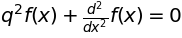

In [5]:
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex=True)
#from sympy.abc import E, h, m, L, q # E es la Energía, m la masa del elctron y h la constante de Planck
from sympy import *
import sympy as sp
x = symbols('x')
f = Function('f', complex=True)(x)
E, m, h, L, q = symbols('E m h L q', positive=True)
n = symbols('n', positive=True, intenger=True)
#f, g, h = symbols('f g h', cls=Function)
#EcSch = Eq(f.diff(x,x)+((8*(sp.pi**2)*m)/(h**2))*K*f,0)
EcSch = Eq(f.diff(x,x)+(q**2)*f,0)
display(EcSch)
sol=dsolve(EcSch,f)
sol

### <div class="alert alert-danger">donde **$q=\frac{\sqrt{2mE}}{\hbar}$** **<div class="alert alert-warning">y las condiciones de frontera: $\psi_n(0)=\psi_n(L)=0$**</div>

In [6]:
constan = sp.solve([sol.rhs.subs(x,0) - 0, sol.rhs.subs(x,L)- 0]) 
constan

In [7]:
C1, C2 = sp.symbols('C1 C2')
soln = sol.subs(constan[1]) 
soln.simplify()

<div class="alert alert-info">$C_1sin(qL) = 0$ si $qL=0, \pm\pi, \pm 2\pi, \pm 3\pi...n\pi$; entonces
$q=\frac{\pm\pi}{L}, \frac{\pm 2\pi}{L}, \frac{\pm 3\pi}{L}...\frac{n\pi}{L}$

Ahora Normalizamos la función y en contramos el valor de la onstante $C_1$

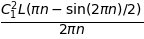

In [8]:
Int=sp.integrate((C1*sin(x*n*pi/L))**2, (x, 0, L))
Int.simplify()

 $$\frac{C_1^2L}{2}=1$$
 $$C_1 = \sqrt{\frac{2}{L}}$$

<div class="alert alert-danger">Por tanto la solución obtenida despues de solución de Schrödinger:

$$\large \psi_n(x) = \sqrt{\frac{2}{L}} sin\left(\frac{n\pi}{L}x\right)$$
donde $n=1, 2, ..., \infty $.  
Es importante enfatizar que la cuantización (con *n* solo enteros positivos) es consecuencia de las condiciones de frontera, más específicamente con el confinamiento.

<div class="alert alert-info">Ahora vamos a graficar la función de onda, $\large \psi_n(x)$ la **función de probabilidad**, $\large |\psi_n(x)|^2$ de la partícula en una caja de potencial infinito 1D para diferentes estado de $n$.

Introduzca el valor del número cuántico n =  3
Introduzca el valor del tamaño de la caja, L, en Angstroms =  1


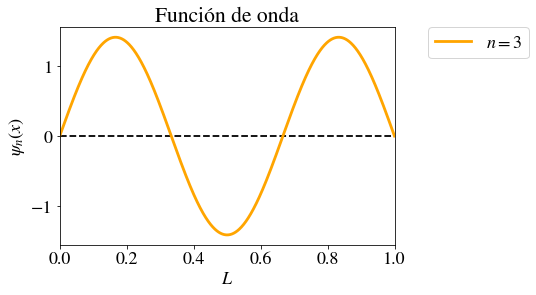

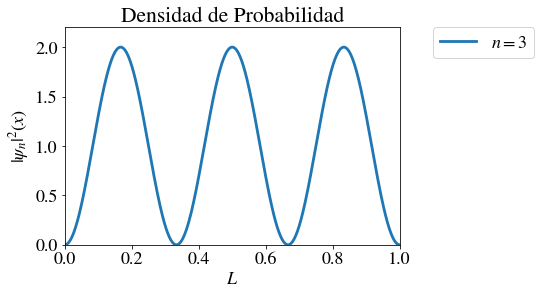

In [22]:
# Definimos la función de onda
def psi(x,n,L): return np.sqrt(2.0/L)*np.sin(float(n)*np.pi*x/L)

# Leemos los valores de n y L intrducidos por el usuario
n = int(input("Introduzca el valor del número cuántico n = "))
L = float(input("Introduzca el valor del tamaño de la caja, L, en Angstroms = "))

# Generamos las Gráficas
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
x = np.linspace(0, L, 900)
fig, ax = plt.subplots()
lim1=np.sqrt(2.0/L) # Maximo valor de la función de onda
ax.axis([0.0,L,-1.1*lim1,1.1*lim1]) # Límites de la gráfica en los ejes 
str1=r"$n = "+str(n)+r"$"
ax.plot(x, psi(x,n,L), linestyle='-', label=str1, color="orange", linewidth=2.8) # Graficamos la funciòn de onda
ax.hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black") # Linea horizontal en O
# Etiquetas, leyendas, etc
ax.legend(loc=2);
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$\psi_n(x)$')
plt.title('Función de onda')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)

# Gràficas de la densidad de probabilidad
fig, ax = plt.subplots()
ax.axis([0.0,L,0.0,lim1*lim1*1.1])
str1=r"$n = "+str(n)+r"$"
ax.plot(x, psi(x,n,L)*psi(x,n,L), label=str1, linewidth=2.8)
ax.legend(loc=2);
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$|\psi_n|^2(x)$')
plt.title('Densidad de Probabilidad')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)

# Muestra las gràficas
plt.show()

<div class="alert alert-info">Podemos explorar los cambios en la **Función de onda** y la **Densidad de Probabilidad** en un estado*n* determinado, variando la longitud $L$ de la caja: 

Para comparar las funciones de onda de dos cajas con diferentes valores de L 
introduzca el valor de L de la primera caja (en Angstroms y no mayor a 20 A) =  1
Introduzca el valor de L de la segunda caja (en Angstroms y no mayor a 20 A) =  2


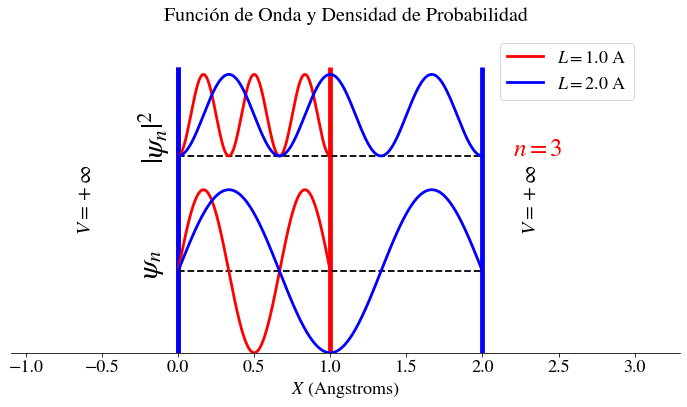

In [23]:
# Imponemos una restricción en el valor de L inferior a 20 Angstroms
L = 100.0
while(L>20.0):
    L1 = float(input("Para comparar las funciones de onda de dos cajas con diferentes valores de L \nintroduzca el valor de L de la primera caja (en Angstroms y no mayor a 20 A) = "))
    L2 = float(input("Introduzca el valor de L de la segunda caja (en Angstroms y no mayor a 20 A) = "))
    L = max(L1,L2)
    if(L>20.0):
        print ("El tamaño de la caja no puede ser mayor a 20 A. por favor ingrese los valores nuevamente.\n")

# Generando las gráficas de la Funciòn de onda y la Densidad de Probabilidad
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(12,6))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
val = 1.1*max(L1,L2)
X1 = np.linspace(0.0, L1, 900,endpoint=True)
X2 = np.linspace(0.0, L2, 900,endpoint=True)
ax.axis([-0.5*val,1.5*val,-np.sqrt(2.0/L),3*np.sqrt(2.0/L)])
ax.set_xlabel(r'$X$ (Angstroms)')
strA="$\psi_n$"
strB="$|\psi_n|^2$"
ax.text(-0.12*val, 0.0, strA, rotation='vertical', fontsize=30, color="black")
ax.text(-0.12*val, np.sqrt(4.0/L), strB, rotation='vertical', fontsize=30, color="black")
str1=r"$L = "+str(L1)+r"$ A"
str2=r"$L = "+str(L2)+r"$ A"
ax.plot(X1,psi(X1,n,L1)*np.sqrt(L1/L), color="red", label=str1, linewidth=2.8)
ax.plot(X2,psi(X2,n,L2)*np.sqrt(L2/L), color="blue", label=str2, linewidth=2.8)
ax.plot(X1,psi(X1,n,L1)*psi(X1,n,L1)*(L1/L) + np.sqrt(4.0/L), color="red", linewidth=2.8)
ax.plot(X2,psi(X2,n,L2)*psi(X2,n,L2)*(L2/L) + np.sqrt(4.0/L), color="blue", linewidth=2.8)
ax.margins(0.00)
ax.legend(loc=9)
str2="$V = +\infty$"
ax.text(1.03*val,  0.5*np.sqrt(2.0/L), str2, rotation='vertical', fontsize=20, color="black")
ax.text(-0.3*val, 0.5*np.sqrt(2.0/L), str2, rotation='vertical', fontsize=20, color="black")
ax.vlines(0.0, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="red")
ax.vlines(L1, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="red")
ax.vlines(0.0, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="blue")
ax.vlines(L2, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="blue")
ax.hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black")
ax.hlines(np.sqrt(4.0/L), 0.0, L, linewidth=1.8, linestyle='--', color="black")
plt.title('Función de Onda y Densidad de Probabilidad', fontsize=20)
str3=r"$n = "+str(n)+r"$"
ax.text(1.1*L,np.sqrt(4.0/L), r"$n = "+str(n)+r"$", fontsize=25, color="red")
plt.legend(bbox_to_anchor=(0.73, 0.95), loc=2, borderaxespad=0.)

# Muestra las gráficas
plt.show()

<div class="alert alert-danger">

Ahora, podemos ver los valores de **energía permitidos** en el sistema, la expresiòn se deduce de ***q*** y es dada por:
$$\large E_n = \frac{n^2 h^2}{8mL^2}$$  
donde $m$ es la masa de la partícula.

**Nota:** Es importante observar que la función de onda $\Psi_n(x)$ no depende de la masa de la partícula?

En contrast a la soluciòn de la partícula libre, para la partícula confinada en una caja de potencial, no todos los valores de la energía son permitidos. L a cuantizaciòn es consecuencia directa de las condiciones de frontera (confinamiento). En otras palabras, el confinamiento lleva a la cuantización.

Vamos a ver ahora como cambian los **Niveles de Energía** $E_n$ de la partícula (electrón) en función del **tamaño de la caja**.

Para ver como cambia la energía de cajas de diferente longitud, 
introduzca el valor de L para la primera caja (en Angstroms) =  1
Introduzca el número de niveles que desea graficar para la primera caja =  3
Introduzca el valor de L para la segunda caja (en Angstroms) =  20
Introduzca el número de niveles que desea graficar para la segunda caja =  3


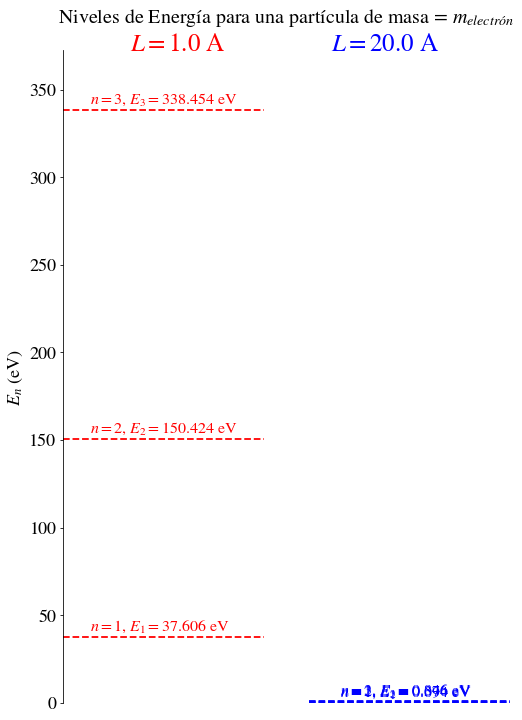

In [25]:
#Parámetros

h=6.62607e-34    #Constante de Planck en joules
me=9.1093837e-31  # masa del electrón en kg
# (h**2 / (me*8))* (1e10)**2 *6.242e+18  #Prefactor en unidades de longitud en Angstroms y luego convertido en converted into electrón-voltios (eV)

# Definimos la función para calcular la energía

def En(n,L,m): return (h**2 / (m*8))* (1e10)**2 *6.242e+18*((float(n)/L)**2)

# Leemos los valor introducidos por el operador
L1 = float(input("Para ver como cambia la energía de cajas de diferente longitud, \nintroduzca el valor de L para la primera caja (en Angstroms) = "))
nmax1 = int(input("Introduzca el número de niveles que desea graficar para la primera caja = "))
L2 = float(input("Introduzca el valor de L para la segunda caja (en Angstroms) = "))
nmax2 = int(input("Introduzca el número de niveles que desea graficar para la segunda caja = "))

# Generando las gráficas
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(8,12))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
val = 1.1*max(En(nmax1,L1,me),En(nmax2,L2,me))
val2= 1.1*max(L1,L2)
ax.axis([0.0,10.0,0.0,val])
ax.set_ylabel(r'$E_n$ (eV)')
for n in range(1,nmax1+1):
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L1,me))
    ax.text(0.6, En(n,L1,me)+0.01*val, str1, fontsize=16, color="red")
    ax.hlines(En(n,L1,me), 0.0, 4.5, linewidth=1.8, linestyle='--', color="red")
for n in range(1,nmax2+1):
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L2,me))
    ax.text(6.2, En(n,L2,me)+0.01*val, str1, fontsize=16, color="blue")
    ax.hlines(En(n,L2,me), 5.5, 10.0, linewidth=1.8, linestyle='--', color="blue")
str1=r"$L = "+str(L1)+r"$ A"
plt.title("Niveles de Energía para una partícula de masa = $m_{electrón}$ \n ", fontsize=20)
str1=r"$L = "+str(L1)+r"$ A"
str2=r"$L = "+str(L2)+r"$ A"
ax.text(1.5,val, str1, fontsize=25, color="red")
ax.text(6,val, str2, fontsize=25, color="blue")

# Muestra las gráficas
plt.show()

 <div class="alert alert-info"> 
  
y ahora veamos como cambian los *Niveles de Energía*, $E_n$ en función de la **masa de la partícula**.


Introduzca el valor de L de las dos cajas (en Angstroms) =  1
Para ver como cambia la energía de partículas de diferente masa, 
Introduzca el valor de la masa para la primera partícula (en unidades de masa de 1 electrón) =  1
Introduzca el número de niveles que desea graficar de la primera caja =  3
Introduzca el valor de la masa para la segunda partícula (en unidades de masa de 1 electrón) =  10
Introduzca el número de niveles que desea graficar de la segunda caja =  3


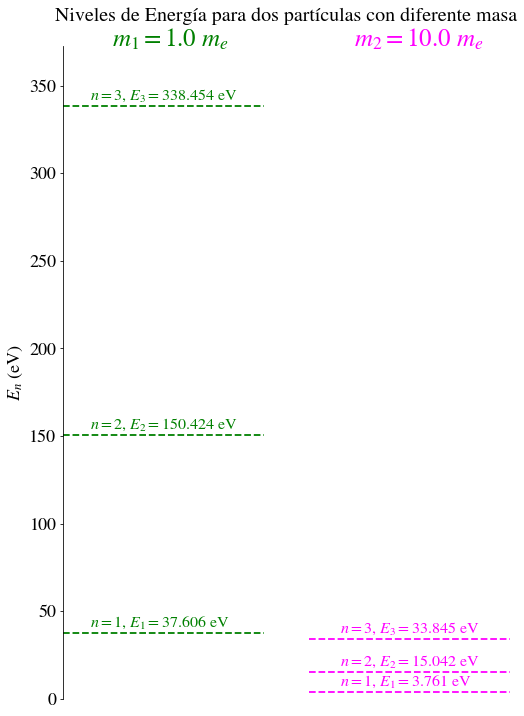

In [27]:
# Lee la variables ingresadas por el operador
L = float(input("Introduzca el valor de L de las dos cajas (en Angstroms) = "))
m1 = input("Para ver como cambia la energía de partículas de diferente masa, \nIntroduzca el valor de la masa para la primera partícula (en unidades de masa de 1 electrón) = ")
nmax1 = int(input("Introduzca el número de niveles que desea graficar de la primera caja = "))
m2 = input("Introduzca el valor de la masa para la segunda partícula (en unidades de masa de 1 electrón) = ")
nmax2 = int(input("Introduzca el número de niveles que desea graficar de la segunda caja = "))

# Graficando
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(8,12))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
m1=float(m1)
m2=float(m2)
val = 1.1*max(En(nmax1,L,m1*me),En(nmax2,L,m2*me))
val2= 1.1*max(m1,m2)
ax.axis([0.0,10.0,0.0,val])
ax.set_ylabel(r'$E_n$ (eV)')
for n in range(1,nmax1+1):
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L,m1*me))
    ax.text(0.6, En(n,L,m1*me)+0.01*val, str1, fontsize=16, color="green")
    ax.hlines(En(n,L,m1*me), 0.0, 4.5, linewidth=1.8, linestyle='--', color="green")
for n in range(1,nmax2+1):
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L,m2*me))
    ax.text(6.2, En(n,L,m2*me)+0.01*val, str1, fontsize=16, color="magenta")
    ax.hlines(En(n,L,m2*me), 5.5, 10.0, linewidth=1.8, linestyle='--', color="magenta")
str1=r"$m = "+str(m1)+r"$ A"
plt.title("Niveles de Energía para dos partículas con diferente masa\n ", fontsize=20)
str1=r"$m_1 = "+str(m1)+r"$ $m_e$ "
str2=r"$m_2 = "+str(m2)+r"$ $m_e$ "
ax.text(1.1,val, str1, fontsize=25, color="green")
ax.text(6.5,val, str2, fontsize=25, color="magenta")

# Muestra la gráfica
plt.show()

<div class="alert alert-danger">

Podemos poner en misma gráfica información de la **Función de Onda**, la **Densidad de Probabilidad** y los **Nivels de Energía**

Introduzca el valor de  L (en Angstroms) =  1
Introduzca el valor máximo de n que desea graficar =  3


No handles with labels found to put in legend.
No handles with labels found to put in legend.


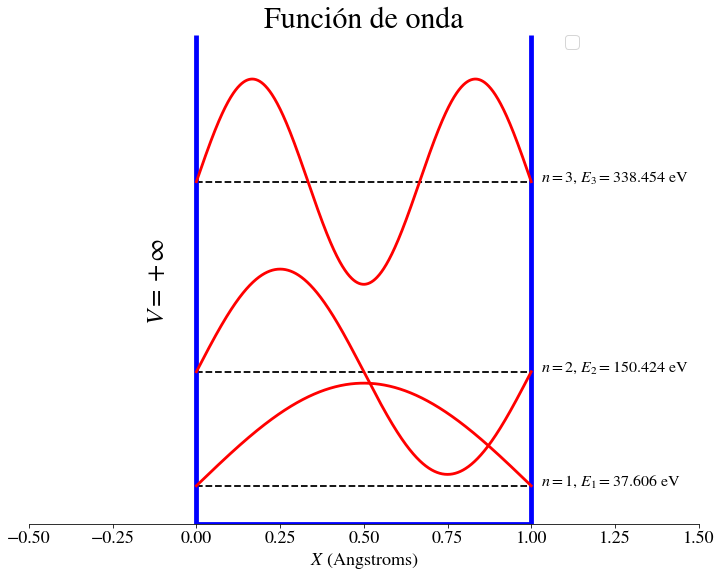

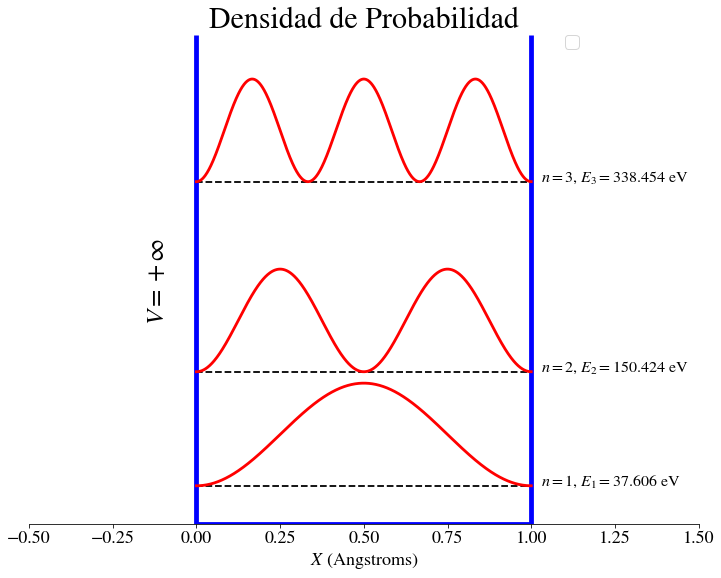

In [28]:
# Entradas del usuario u operador L
L = float(input("Introduzca el valor de  L (en Angstroms) = "))
nmax = int(input("Introduzca el valor máximo de n que desea graficar = "))

# Generando gráficas de la Función de onda
fig, ax = plt.subplots(figsize=(12,9))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
X3 = np.linspace(0.0, L, 900,endpoint=True)
Emax = En(nmax,L,me)
amp = (En(2,L,me)-En(1,L,me)) *0.9
Etop = (Emax+amp)*1.1
ax.axis([-0.5*L,1.5*L,0.0,Etop])
ax.set_xlabel(r'$X$ (Angstroms)')

for n in range(1,nmax+1):
    ax.hlines(En(n,L,me), 0.0, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L,me))
    ax.text(1.03*L, En(n,L,me), str1, fontsize=16, color="black")
    ax.plot(X3,En(n,L,me)+amp*np.sqrt(L/2.0)*psi(X3,n,L), color="red", label="", linewidth=2.8)
ax.margins(0.00)
ax.vlines(0.0, 0.0, Etop, linewidth=4.8, color="blue")
ax.vlines(L, 0.0, Etop, linewidth=4.8, color="blue")
ax.hlines(0.0, 0.0, L, linewidth=4.8, color="blue")
plt.title('Función de onda', fontsize=30)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
str2="$V = +\infty$"
ax.text(-0.15*L, 0.6*Emax, str2, rotation='vertical', fontsize=25, color="black")

# Generando gráfica de la Densidad de Probabiidad
fig, ax = plt.subplots(figsize=(12,9))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
X3 = np.linspace(0.0, L, 900,endpoint=True)
Emax = En(nmax,L,me)
ax.axis([-0.5*L,1.5*L,0.0,Etop])
ax.set_xlabel(r'$X$ (Angstroms)')
for n in range(1,nmax+1):
    ax.hlines(En(n,L,me), 0.0, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L,me))
    ax.text(1.03*L, En(n,L,me), str1, fontsize=16, color="black")
    ax.plot(X3,En(n,L,me)+ amp*(np.sqrt(L/2.0)*psi(X3,n,L))**2, color="red", label="", linewidth=2.8)
ax.margins(0.00)
ax.vlines(0.0, 0.0, Etop, linewidth=4.8, color="blue")
ax.vlines(L, 0.0, Etop, linewidth=4.8, color="blue")
ax.hlines(0.0, 0.0, L, linewidth=4.8, color="blue")
plt.title('Densidad de Probabilidad', fontsize=30)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
str2="$V = +\infty$"
ax.text(-0.15*L, 0.6*Emax, str2, rotation='vertical', fontsize=25, color="black")

# Muestra las gráficas
plt.show()

<div class="alert alert-danger">
<p style="text-align:justify">

**Transiciones entre estados**: La interacción con el campo eléctrico de la radiación electromagnética
puede inducir la transición entre dos estados de la partícula $ψ_i → ψ_j$ . En este proceso: (1)
se absorbe o emite un fotón de energía $hν = |E_j − E_i|$; (2) la intensidad de la transición es
proporcional al cuadrado del dipolo transición, esto es, al cuadrado de la integral $\langle ψ_i|\hat{µ}|ψ_j\rangle$, donde $\hat{µ}$ es el operador dipolo eléctrico. Para la partícula en la caja 1D $\hat{µ} = q\hat{x}$:

$$\large \langle \Psi_i|\hat{\mu}|\Psi_j\rangle=\frac{2q}{a}\int^{a}_{0} sen(\frac{i\pi x}{a})xsen(\frac{j\pi x}{a})dx$$
$$\large ξ = πx/a ⇒ dξ = (π/a)dx$$
$$\large =\frac{2qa}{\pi^2}\int^{\pi}_{0} sen(i\xi)\xi sen(j\xi)d\xi$$
$$\large =\frac{qa}{\pi^2}\int^{\pi}_{0} [cos(\Delta n\xi) - cos(N\xi)]\xi d\xi$$
donde $\Delta n = i − j \neq 0$ y $N = i + j$, aquí hemos usado la relación trigonométrica $2sen(\alpha)sen(\beta) = cos(\alpha - \beta) − cos(\alpha + \beta)$, podemos resolver una de las integrales como, $$\large \frac{qa}{\pi^2}\int^{\pi}_{0} cos(m\xi)\xi d\xi$$   </p>

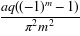

In [29]:
import sympy as sp
sp.init_printing()
x, q, a = sp.symbols('x q a')
m = sp.Symbol('m', integer=True, positive=True)

idip=sp.integrate(((q*a)/sp.pi**2)*(sp.cos(m*x)*x), (x, 0, sp.pi))
idip.simplify()

<div class="alert alert-success">   
El resultado se puede expresar así:    
$$ \large \frac{qa}{\pi^2}\int^{\pi}_{0} cos(m\xi)\xi d\xi = \left\{ \begin{array}{ll}
-\frac{2aq}{\pi^2 m^2} & \textrm{si m es impar}\\
0 & \textrm{si m es par}
\end{array} \right.$$

<div class="alert alert-success">
Puesto que $N = i + j$ y $∆n = i − j$ son de la misma paridad, la integral del dipolo quedaría;
$$ \large \langle \Psi_i|\hat{\mu}|\Psi_j\rangle = \left\{ \begin{array}{ll}
\frac{2aq}{\pi^2}(\frac{1}{N^2} - \frac{1}{\Delta n^2}) & \textrm{si N o $\Delta n$ es impar}\\
0 & \textrm{si m es par}
\end{array} \right.$$
Por lo tanto, las transiciones entre estados de la misma paridad están prohibidas, y sólo son
permitidas las transiciones entre un estado de número cuántico impar y otro de número par. Por
otra parte, como vemos en el cálculo siguiente, $\langle \Psi_i|\hat{\mu}|\Psi_j\rangle^2$ disminuye rápidamente al aumentar $∆n$, de modo que las únicas transiciones de intensidad apreciable serán aquellas en las que $∆n = ±1$.


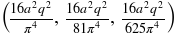

In [30]:
import sympy as sp
sp.init_printing()
x, q, a = sp.symbols('x q a')
m = sp.Symbol('m', integer=True, positive=True)

idip1=(sp.integrate(((2*q*a)/sp.pi**2)*(sp.cos(1*x)*x), (x, 0, sp.pi)))**2 # m=1, n=1--> n=2
idip3=(sp.integrate(((2*q*a)/sp.pi**2)*(sp.cos(3*x)*x), (x, 0, sp.pi)))**2 # m=3, n=1--> n=4
idip5=(sp.integrate(((2*q*a)/sp.pi**2)*(sp.cos(5*x)*x), (x, 0, sp.pi)))**2 # m=5, n=1--> n=6
idip1.simplify(), idip3.simplify(), idip5.simplify()

<div class="alert alert-danger">
<p style="text-align:justify">

**Modelo FEMO (free electron molecular orbitals)**:  Los electrones π de un polieno conjugado se
pueden aproximar como electrones independientes moviéndose libres en una caja del tamaño de la
línea que forman los carbonos. Cada $C$ aporta un electrón $\pi$ y añade $d_{CC} ≈ 1.40 ˚A$ al tamaño de
la caja. Si el polieno consta de $N$ carbonos, $a = Nd_{CC}$ y los niveles de energía serán llenados por
parejas de electrones hasta llegar al nivel $n = N/2$ (supongamos que $N$ es par), que será el último
nivel ocupado (**HOMO**). La transición desde el **HOMO** hasta el siguiente nivel, primero desocupado o **LUMO**, requerirá la absorción de un fotón de frecuencia<p/>
 
$$\large \Delta E=h\nu =\frac{\hbar^2}{8ma^2}[(n+1)^2-n^2]=\frac{\hbar^2}{8mN^2d_{CC}^2}(N+1)\Longrightarrow \bar{\nu}=\frac{\nu}{c} \approx 154740 cm^1[\frac{N+1}{N^2}]$$
  </p>

In [31]:
from IPython.display import HTML
from IPython.display import Image

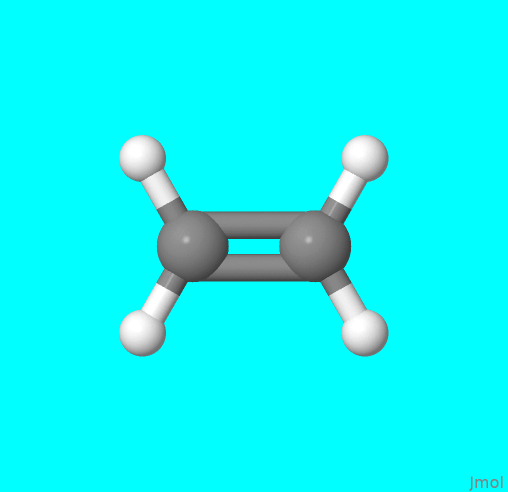

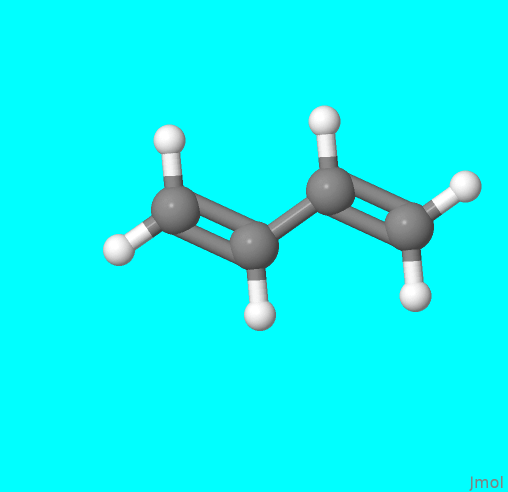

In [32]:
Im1=Image(filename='butadiene.png', width=100, height=100)
Im2=Image(filename='ethene.png',width=100, height=100)
display(Im2); display(Im1)

<div class="alert alert-danger">

| Compuesto    | N | $\large \bar \nu_{cal}$  | $\large \bar \nu_{exp}$ |
|------------  |-- |------------------------  |-----------------------  |
| Eteno        | 2 | 116050                   | 61500                   |
| Butadieno    | 4 | 48356                    | 46080                   |
| Hexatrieno   | 6 | 30088                    | 39750                   |
| Octatetraeno | 8 | 21760                    | 32900                   |
| Vitamina A   | 10 | 17021                   | 30490                   |</div>

<div class="alert alert-info">

Una vez solucionado el modelo de la partìcula una caja 1D, podemos extrapolar su solución a cajas **2D** y **3D** haciendo uso del procedimiento de separaciòn de variables.


<div class="alert alert-warning">

## Partícula en una caja 2D

<div class="alert alert-warning">

El Hamiltoniano de este sistema puede ser separado en dos Hamiltonianos. uno dpendiente solamente de la variable *x* y el otro dependiente, unicamente de la variable *y*. La solución de la ecuación de Schrodinger 2D será una función de onda que corresponde al producto de la soluciòn 1D en *x* e *y* direcciones, con **números cuánticos independientes** $n_x$ y $n_y$:

$$\Psi_{n_x,n_y}(x,y) = \psi_{n_x}(x) \  \psi_{n_y}(y)  =\frac{2}{\sqrt{L_xL_y}} sin\left(\frac{n_x\pi}{L_x}x\right) \; sin\left(\frac{n_y\pi}{L_y}y\right)$$

Veamos la Función de onda de una partícula en una caja 2D 
Introduzca el valor de nx =  2
Introduzca el valor de ny =  2


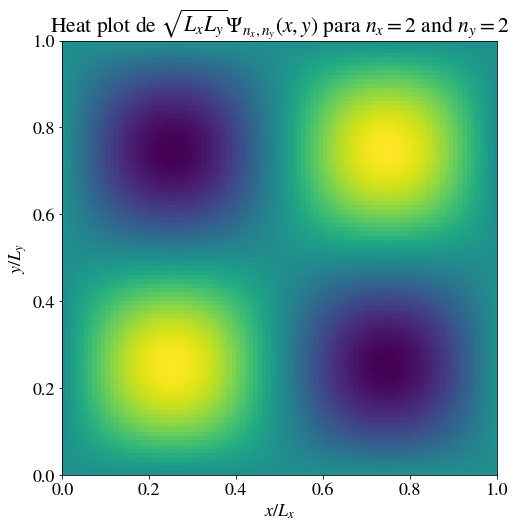

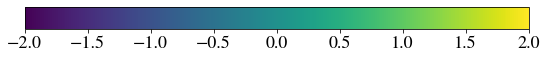

In [34]:
# Definimo la Función de onda 2D
def psi2D(x,y): return 2.0*np.sin(nx*np.pi*x)*np.sin(ny*np.pi*y)

# Here the users inputs the values of n and m
nx = int(input("Veamos la Función de onda de una partícula en una caja 2D \nIntroduzca el valor de nx = "))
ny = int(input("Introduzca el valor de ny = "))

# Generando la Gráfica
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
fig, axes = plt.subplots(1, 1, figsize=(8,8))
axes.imshow(psi2D(X,Y), origin='lower', extent=[0.0, 1.0, 0.0, 1.0])
axes.set_title(r'Heat plot de $\sqrt{L_xL_y}\Psi_{n_x,n_y}(x,y)$ para $n_x='+str(nx)+r'$ and $n_y='+str(ny)+r'$')
axes.set_ylabel(r'$y/L_y$')
axes.set_xlabel(r'$x/L_x$')

# Gráficas de densidad
fig = plt.figure(figsize=(10,3))
colbar = fig.add_axes([0.05, 0.80, 0.7, 0.10])
norm = mpl.colors.Normalize(vmin=-2.0, vmax=2.0)
mpl.colorbar.ColorbarBase(colbar, norm=norm, orientation='horizontal')

# 
plt.show()

<div class="alert alert-info">

### Y la ENERGÍA?  
Cuando el Hamiltoniano puede ser separado en Hamiltonianos independientes, la Función de Onda Total (2D) se expresa como un producto de las funciones onda independientes y la energía estará dada por la suma de las energía 1D:

<div class="alert alert-info">

$$\large E_{n_x,n_y} = E_{n_x} +E_{n_y} = \ \  \frac{ h^2}{8m_p} \frac{n_x^2}{L_x^2}+ \frac{ h^2}{8m_p}\frac{n_y^2}{L_y^2} = \ \  \frac{ h^2}{8m_p}\left(\frac{n_x^2}{L_x^2}+\frac{n_y^2}{L_y^2}\right)$$  

<div class="alert alert-info">

Dependiendo de los vañores de $L_x$ and $L_y$ (la longitud de cada lado de la caja), podemos tener o no **Estados degenerados en energía**: que corresponde a más de un estado con el mismo valor de energía.  

Veamos estos ***niveles de energía*** como una función de los números cuánticos y el tamaño de la caja:

Podemos determinar estados degenerados 
Introduzca el valor de Lx (en Angstroms) =  1
Introduzca el máximo valor de nx a contabilizar =  3
Introduzca el valor de Ly (en Angstroms)) =  1
Introduzca el máximo valor de ny a contabilizar =  3


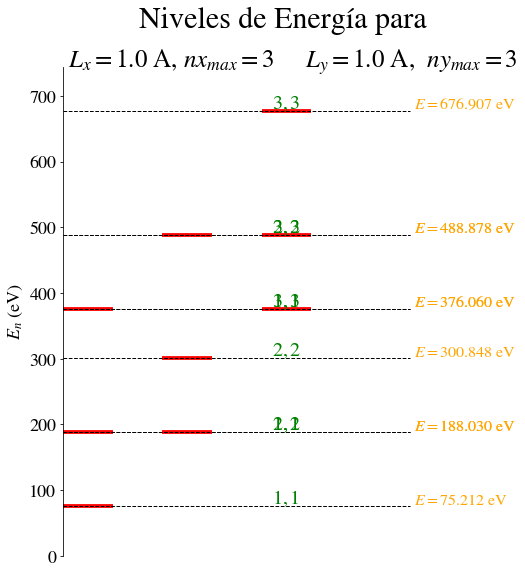

In [35]:
# Definimos la Función energía
def En2D(nx,ny,L1,L2): return 37.60597*((float(nx)/L1)**2+ (float(ny)/L2)**2)

# 
L1 = float(input("Podemos determinar estados degenerados \nIntroduzca el valor de Lx (en Angstroms) = "))
nmax1 = int(input("Introduzca el máximo valor de nx a contabilizar = "))
L2 = float(input("Introduzca el valor de Ly (en Angstroms)) = "))
mmax2 = int(input("Introduzca el máximo valor de ny a contabilizar = "))

# Graficando Niveles de Energía
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(nmax1*2+2,nmax1*3))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
val = 1.1*(En2D(nmax1,mmax2,L1,L2))
val2= 1.1*max(L1,L2)
ax.axis([0.0,3*nmax1,0.0,val])
ax.set_ylabel(r'$E_n$ (eV)')
for nx in range(1,nmax1+1):
    for ny in range(1, mmax2+1):
        str1="$"+str(nx)+r","+str(ny)+r"$"
        str2=" $E = %.3f$ eV"%(En2D(nx,ny,L1,L2))
        ax.text(n*2-1.8, En2D(nx,ny,L1,L2)+ 0.005*val, str1, fontsize=20, color="green")
        ax.hlines(En2D(nx,ny,L1,L2), nx*2-2, nx*2-1, linewidth=3.8, color="red")
        ax.hlines(En2D(nx,ny,L1,L2), 0.0, nmax1*2+1, linewidth=1., linestyle='--', color="black")
        ax.text(nmax1*2+1, En2D(nx,ny,L1,L2)+ 0.005*val, str2, fontsize=16, color="orange")       
plt.title("Niveles de Energía para \n ", fontsize=30)
str1=r"$L_x = "+str(L1)+r"$ A, $nx_{max} = "+str(nmax1)+r"$     $L_y = "+str(L2)+r"$ A,  $ny_{max}="+str(mmax2)+r"$"
ax.text(0.1,val, str1, fontsize=25, color="black")
# Muestra la gráfica
plt.show()

<div class="alert alert-success">

En esta gráfica, cada estado es representado por los **números cuánticos** $(n_x,n_y)$. Po ejemplo, si $L_x =L_y$ asì que el estado descrito por $(a,b)$ será degenerado con el estado descrito por $(b,a)$.  

Los **números cuánticos** indentífican los **estados** y los valores de **energía** identífican los **niveles**. 

* Este Script fue escrito por Vinícius Wilian D. Cruzeiro, Xiang Gao, Valeria D. Kleiman y Adaptado por Enrique Mejía Ospino